In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('stock_price/Google_Stock_Price_Train.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
df = df.iloc[:,1:2].values
df

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
sc = MinMaxScaler()
df = sc.fit_transform(df)

In [6]:
df

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
x_train = df[0:1257]
y_train = df[1:1258]

In [8]:
x_train = np.reshape(x_train,(1257,1,1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [10]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation='sigmoid',input_shape =(None,1)))

In [11]:
regressor.add(Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [13]:
regressor.fit(x_train,y_train,batch_size= 32 ,epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 711us/step - loss: 0.0983
Epoch 2/200
1257/1257 [==============================] - 0s 99us/step - loss: 0.0795
Epoch 3/200
1257/1257 [==============================] - 0s 104us/step - loss: 0.0744
Epoch 4/200
1257/1257 [==============================] - 0s 104us/step - loss: 0.0722
Epoch 5/200
1257/1257 [==============================] - 0s 107us/step - loss: 0.0699
Epoch 6/200
1257/1257 [==============================] - 0s 118us/step - loss: 0.0677
Epoch 7/200
1257/1257 [==============================] - 0s 115us/step - loss: 0.0653
Epoch 8/200
1257/1257 [==============================] - 0s 101us/step - loss: 0.0630
Epoch 9/200
1257/1257 [==============================] - 0s 96us/step - loss: 0.0606
Epoch 10/200
1257/1257 [==============================] - 0s 99us/step - loss: 0.0581
Epoch 11/200
1257/1257 [==============================] - 0s 101us/step - loss: 0.0557
Epoch 12/200
1257/1257 [==============================]

1257/1257 [==============================] - 0s 93us/step - loss: 2.6709e-04
Epoch 94/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.6544e-04
Epoch 95/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.6578e-04: 0s - loss: 2.8127e-
Epoch 96/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.7327e-04
Epoch 97/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.6475e-04
Epoch 98/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.6445e-04
Epoch 99/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.6464e-04
Epoch 100/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.6458e-04
Epoch 101/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.6406e-04
Epoch 102/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.6623e-04
Epoch 103/200
1257/1257 [==============================] - 0s 98us/step - loss: 2.6418e-0

1257/1257 [==============================] - 0s 93us/step - loss: 2.5213e-04
Epoch 183/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.5921e-04
Epoch 184/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.5505e-04
Epoch 185/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.5307e-04
Epoch 186/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.5233e-04
Epoch 187/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.5600e-04
Epoch 188/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.5956e-04
Epoch 189/200
1257/1257 [==============================] - 0s 93us/step - loss: 2.6352e-04
Epoch 190/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.5833e-04
Epoch 191/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.5363e-04
Epoch 192/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.5906e-04
Epoch 193/200

In [15]:
df_test = pd.read_csv('stock_price/Google_Stock_Price_Test.csv')
df_test = df_test.iloc[:,1:2].values
real_price = df_test
df_test = sc.fit_transform(df_test)
df_test = np.reshape(df_test,(20,1,1))
df_test

array([[[0.        ]],

       [[0.16186441]],

       [[0.12322034]],

       [[0.27881356]],

       [[0.46762712]],

       [[0.49237288]],

       [[0.44389831]],

       [[0.48016949]],

       [[0.4859322 ]],

       [[0.47915254]],

       [[0.45762712]],

       [[0.4459322 ]],

       [[0.47627119]],

       [[0.4820339 ]],

       [[0.73711864]],

       [[0.86118644]],

       [[1.        ]],

       [[0.94745763]],

       [[0.60762712]],

       [[0.3059322 ]]])

In [16]:
predected_value = regressor.predict(df_test)

In [17]:
predected_value = sc.inverse_transform(predected_value)
predected_value

array([[779.09204],
       [788.3295 ],
       [786.0839 ],
       [795.2407 ],
       [806.5972 ],
       [808.08826],
       [805.1664 ],
       [807.3532 ],
       [807.7004 ],
       [807.29193],
       [805.9943 ],
       [805.28906],
       [807.1183 ],
       [807.4655 ],
       [822.59875],
       [829.6433 ],
       [837.1484 ],
       [834.35986],
       [814.9929 ],
       [796.8623 ]], dtype=float32)

<function matplotlib.pyplot.legend(*args, **kwargs)>

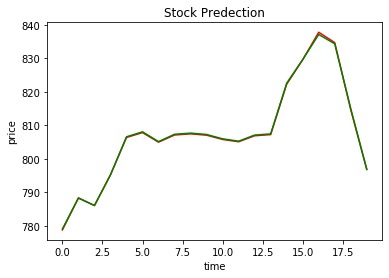

In [18]:
plt.plot(real_price,color = 'red',label = 'Real Stock Price')
plt.plot(predected_value,color = 'green',label = 'predected stock price')
plt.title('Stock Predection')
plt.xlabel('time')
plt.ylabel('price')
plt.legend

In [19]:
import math
from sklearn.metrics import mean_squared_error
error = math.sqrt(mean_squared_error(real_price,predected_value))
error

0.25018530098616